In [2]:
# Q1. Importing required libraries
import pandas as pd
import numpy as np

In [3]:
# Q2. Reading data from given file
Ins = pd.read_csv("insurance.csv")
Ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# Q3a. Checking for the shape of the data
Ins.shape

(1338, 7)

In [5]:
# Q3b. Data type of each of the attributes
Ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Q3c. Checking if there are any missing values across all the attributes in the data set
Ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
# Q3d. Find out 5 point summary of numerical attributes which includes 
# - Median (which is also 50th percentile)
# - 1st quartile (25th percentile)
# - 3rd quartiles (75th percentile)
# - Minimum (smallest observation in the sameple)
# - Maximum (largest observation in the sameple)

# 5 point summary data can be seen in the outcome of describe function for all numerical columns
Ins.describe(include=[np.number])

# Observations
# 1. 50%ile population that has insured are less than 40 years having atleast 1 child
# 2. 25%ile of population is less than 27 years of age and have no children
# 3. 75%ile of population is less than 52 years and have atleast 2 children (seems previous generation has atleast 2 children which has come down)
# 4. Minimum age in the population insured is 18 years and above
# 5. Maximum age insured is 64 years old

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A194BD9F48>,
      dtype=object)

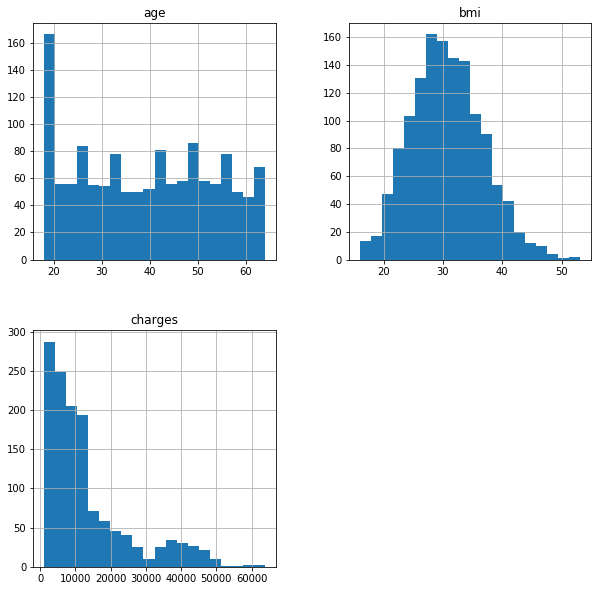

In [62]:
# Q3e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns
Ins.hist(column=['age','bmi','charges'],layout=(2,2), figsize=(10, 10), bins=20)

# Below are the visual observations
# 1. Age - 12% of the population are less than 21 years of age group and rest are equally spread across evenly under other age groups
# 2. Bmi - is high for the age group between 25 to 35
# 3. Charges are more as the age increases

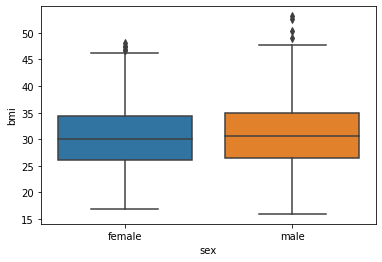

In [63]:
# Additional activity
import seaborn as sns

# Checking if there are any differences in BMI between Male/Female which seems be more or less same
sns.boxplot('sex', 'bmi', data=Ins, width=0.8)

In [60]:
# Q3f. Measure Skewness for bmi, age, charges
Ins.skew(axis=0)

## Below are the observations based on the skew measure using skew function
# 1. Age (0.05) - Distribution of data is Approximately Symmetric given the value of skew is falling between -0.5 & +0.5
# 2. BMI (0.2) - Distribution of data is Approximately Symmetric given the value of skew is falling between -0.5 & +0.5
# 3. Charges (1.5) - Dsitribution of data is highly skewed given the value of skew is more than +1

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

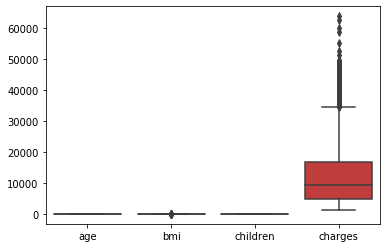

In [68]:
# Q3g. Checking the presence of outliers in ‘bmi’, ‘age’ and 'charges' columns (using boxplot - visually)

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=Ins)

## Visual Observations below 
# Charges has outliers as the below boxplot indicates beyond approximately 35k reminder of dataset values are clearly outliers
# BMI also has outlier(s)
# Age & Children do not have any outliers

In [86]:
# Q3g. Checking the presence of outliers in ‘bmi’ column (statistically using IQR / Lower & Upper bound calculation)
import numpy as np

# Calculating IQR for bmi column
Ins.sort_values(by=['bmi'])
q1, q3 = np.percentile(Ins['bmi'],[25,75])
IQR = q3-q1

# Identifying Lower and Upper bound for bmi column
lower_bound = q1 -(1.5 * IQR) 
upper_bound = q3 +(1.5 * IQR)

# Since all the values are positive, checking the list of values that are more than Upper bound to prove we have outliers in "BMI" column
df = Ins.loc[(Ins["bmi"] > upper_bound),['bmi']]
df.head()

## Observation - there are outliers found in bmi column statistically

,bmi
116,49.06
286,48.07
401,47.52
543,47.41
847,50.38


In [153]:
# Q3g. Checking the presence of outliers in ‘age’ column (statistically using IQR / Lower & Upper bound calculation)
import numpy as np

# Calculating IQR for bmi column
Ins.sort_values(by=['age'])
q1, q3 = np.percentile(Ins['age'],[25,75])
IQR = q3-q1

# Identifying Lower and Upper bound for bmi column
lower_bound = q1 -(1.5 * IQR) 
upper_bound = q3 +(1.5 * IQR)

# Given the attribute has all positive values, checking the list of values that are more than Upper bound to prove we have outliers in "Age" column
df = Ins.loc[(Ins["age"] > upper_bound),['age']]
df.head()

## Observation - NO outliers found in age column statistically

,age


In [156]:
# Q3g. Checking the presence of outliers in ‘Charges’ column (statistically using IQR / Lower & Upper bound calculation)
import numpy as np

# Calculating IQR for bmi column
Ins.sort_values(by=['charges'])
q1, q3 = np.percentile(Ins['charges'],[25,75])
IQR = q3-q1

# Identifying Lower and Upper bound for bmi column
lower_bound = q1 -(1.5 * IQR) 
upper_bound = q3 +(1.5 * IQR)

# Given the attribute has all positive values, checking the list of values that are more than Upper bound to prove we have outliers in "Charges" column
df = Ins.loc[(Ins["charges"] > upper_bound),['charges']]
df.head()

## Observation - There are outliers found in Charges column statistically

,charges
14,39611.7577
19,36837.4670
23,37701.8768
29,38711.0000
30,35585.5760


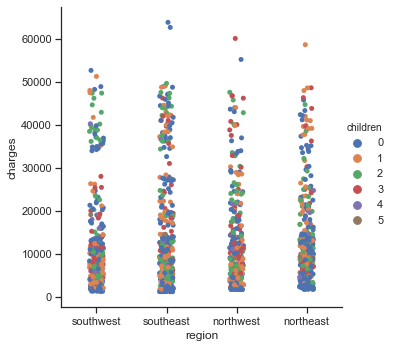

In [106]:
# Q3h. Distribution of categorical columns (Region Vs Charges)

import seaborn as sns
import matplotlib.pyplot as plt

# Using catplot function to evaluate data distribution between Region & Charges
sns.set(style="ticks", color_codes=True)
g = sns.catplot(x="region", y="charges", hue="children", data=Ins)

## Observations Regions against Charges coloring done based on the no. of children
# 1. There were outliers in regions southeast, northwest & norhteast
# 2. Majority of the population charges are under 20k across all regions
# 3. No. of children is mixed up across Regions & Charges

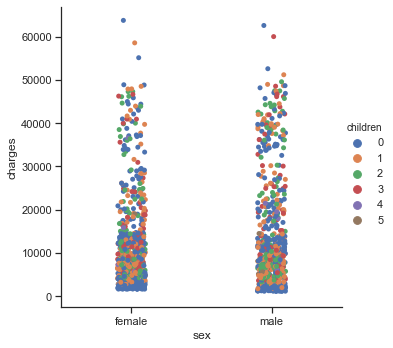

In [107]:
# Q3h. Distribution of categorical columns (Sex Vs Charges)

import seaborn as sns
import matplotlib.pyplot as plt

# Using catplot function to evaluate data distribution between Region & Charges
sns.set(style="ticks", color_codes=True)
g = sns.catplot(x="sex", y="charges", hue="children", data=Ins)

## Observations Regions against Charges coloring done based on the no. of children
# 1. Male population seems to be little higher than female and also paying little more than females
# 2. Most of the females falling under 30k slab of charges may be because of age/bmi/non-smoker
# 3. Outliers seems to be more in female group compared with male group

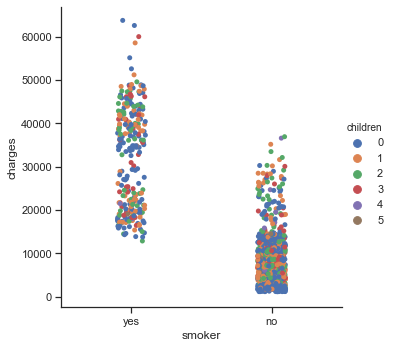

In [108]:
# Q3h. Distribution of categorical columns (Smoker Vs Charges)

import seaborn as sns
import matplotlib.pyplot as plt

# Using catplot function to evaluate data distribution between Region & Charges
sns.set(style="ticks", color_codes=True)
g = sns.catplot(x="smoker", y="charges", hue="children", data=Ins)

## Observations Regions against Charges coloring done based on the no. of children
# 1. Smoker population seems to be paying higher charges than than non-smokers
# 2. Majority of the crowd from this population falls under non-smoker group which is good and may be because of female population

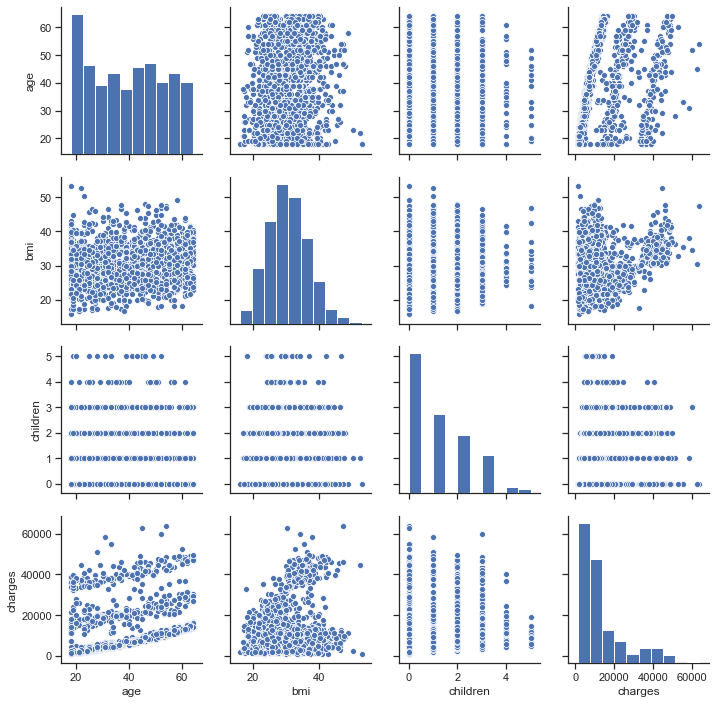

In [104]:
# Q3i. Pair plot that includes all the columns of the data frame

import seaborn as sns
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(Ins)

## Observations
# 1. As the age grows insurance charges are higher
# 2. BMI increases as AGE increases (may be less focus on the health)
# 3. Majority of the population across age group having right bmi
# 4. Majority of the population has childrens 1 to 3. There is a considerable no. of people who don't have children (could be unmarried) 
# 5. Commonly noticed across observations is that charges goes up as age & bmi increases

In [126]:
# Q4a. Do charges of people who smoke differ significantly from the people who don't?
# Using 2 sampled t-Test to prove charges for who smoke is significantly different from non-smoker

# Extracting required dataset for hypothesis testing
df_smoker = Ins.loc[Ins["smoker"]=="yes", ['charges']]
df_nonsmoker = Ins.loc[Ins["smoker"]=="no", ['charges']]
print("Mean for Smokers", df_smoker.mean())
print("Mean for Non- Smokers", df_nonsmoker.mean())


# Null Hypothesis is that the charges of people who smoke is NOT significantly different
# Alternate hypothesis it that the charges of people who smoke are significantly different 
from scipy import stats
from scipy.stats import ttest_ind

## Performing Two sampled t-test of 2 independant groups Smokers & Non-Smokers using independant scipy function
t_stat, p_val = stats.ttest_ind(df_smoker, df_nonsmoker)
print("T Statistics =", t_stat)
print("p-value =", p_val)

## Check p_value against alpha (0.05 or 5%) whether to reject Null Hypothesis or not
if p_val<0.05:
    print ("We are rejecting Null Hypothesis at 5% level of significance, i.e. Charges for smokers significantly higher than non-smokers")
else:
    print("We are accepting Null Hypothesis at 5% level of significance, i.e. Charges for smokers is equal to non-smokers")

Mean for Smokers charges    32050.231832
dtype: float64
Mean for Non- Smokers charges    8434.268298
dtype: float64
T Statistics = [46.66492117]
p-value = [8.27143584e-283]
We are rejecting Null Hypothesis at 5% level of significance, i.e. Charges for smokers significantly higher than non-smokers


In [128]:
# Q4b. Does bmi of males differ significantly from that of females?
# Using 2 sampled t-Test to prove bmi for males significantly differ from females

# Extracting required dataset for hypothesis testing
df_males = Ins.loc[Ins["sex"]=="male", ['bmi']]
df_females = Ins.loc[Ins["sex"]=="female", ['bmi']]
print("Mean for Males", df_males.mean())
print("Mean for Females", df_females.mean())


# Null Hypothesis is that there is NO significant difference in BMI between Males & Females
# Alternate hypothesis it that there is significant difference in BMI between Males & Females
from scipy import stats
from scipy.stats import ttest_ind

## Performing Two sampled t-test of 2 independant groups Smokers & Non-Smokers using independant scipy function
t_stat, p_val = stats.ttest_ind(df_males, df_females)
print("T Statistics =", t_stat)
print("p-value =", p_val)

## Check p_value against alpha (0.05 or 5%) whether to reject Null Hypothesis or not
if p_val<0.05:
    print ("We are rejecting Null Hypothesis at 5% level of significance, i.e. BMI of Males are significantly differ from Females")
else:
    print("We are accepting Null Hypothesis at 5% level of significance, i.e. BMI of Males does not significantly differ from Females")

Mean for Males bmi    30.943129
dtype: float64
Mean for Females bmi    30.377749
dtype: float64
T Statistics = [1.69675264]
p-value = [0.08997637]
We are accepting Null Hypothesis at 5% level of significance, i.e. BMI of Males does not significantly differ from Females


In [131]:
# Q4c. Is the proportion of smokers significantly different in different genders
# Using 2 sampled t-Test to prove whether porportion of smokers are significantly differ between genders

# Since smoker column is categorical - need to convert it using Label Encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Ins["smoker"]=le.fit_transform(Ins["smoker"])
#Ins

# Extracting required dataset for hypothesis testing
df_males = Ins.loc[Ins["sex"]=="male", ['smoker']]
df_females = Ins.loc[Ins["sex"]=="female", ['smoker']]
print("Mean for Males", df_males.mean())
print("Mean for Females", df_females.mean())


# Null Hypothesis is that there is NO significant difference in proportion of smoking habit between Males & Females
# Alternate hypothesis it that there is significant difference in proportion of smoking habit between Males & Females
from scipy import stats
from scipy.stats import ttest_ind

## Performing Two sampled t-test of 2 independant groups Smokers & Non-Smokers using independant scipy function
t_stat, p_val = stats.ttest_ind(df_males, df_females)
print("T Statistics =", t_stat)
print("p-value =", p_val)

## Check p_value against alpha (0.05 or 5%) whether to reject Null Hypothesis or not
if p_val<0.05:
    print ("We are rejecting Null Hypothesis at 5% level of significance, i.e. Smoking habit of Males are significantly different from Females")
else:
    print("We are accepting Null Hypothesis at 5% level of significance, i.e. NO significant difference in smoking habits between Males & Females")

Mean for Males smoker    0.235207
dtype: float64
Mean for Females smoker    0.173716
dtype: float64
T Statistics = [2.79277327]
p-value = [0.00530037]
We are rejecting Null Hypothesis at 5% level of significance, i.e. Smoking habit of Males are significantly differ from Females


In [150]:
# Q4d. Is the distribution of bmi across women with no children, one child and two children, the same ?
# Comparison to be done with 3 different dataset (BMI of women with no child/1 child/2 children) we will use ANOVA test 

# Extracting required dataset for hypothesis testing
df_W_NC = Ins.loc[(Ins["sex"]=="female") & (Ins["children"]== 0), ['bmi']]
df_W_NC = df_W_NC[df_W_NC.columns[0]]
#df_W_NC


df_W_OneC = Ins.loc[(Ins["sex"]=="female") & (Ins["children"]== 1), ['bmi']]
df_W_OneC = df_W_OneC[df_W_OneC.columns[0]] 
df_W_TwoC = Ins.loc[(Ins["sex"]=="female") & (Ins["children"]== 2), ['bmi']]
df_W_TwoC = df_W_TwoC[df_W_TwoC.columns[0]]
print("Mean for Females with No Child", df_W_NC.mean())
print("Mean for Females with One Child", df_W_OneC.mean())
print("Mean for Females with Two Child", df_W_TwoC.mean())

# Null Hypothesis is that there is NO difference in distribution of BMI between Females having no child/1 child/2 children
# Alternate hypothesis it that There is difference in distribution of BMI between Females having no child/1 child/2 children
from scipy.stats import levene

# Performing Levene test to check that variances of all samples are equal and print the T - test and P-Values
t_test,p_val=levene(df_W_NC, df_W_OneC, df_W_TwoC, center='mean')
print("T Statistics =", t_stat)
print("p-value =", p_val)

# Check p_value against alpha (0.05 or 5%) whether to reject Null Hypothesis or not
if p_val<0.05:
    print ("We are rejecting Null Hypothesis at 5% level of significance, i.e. There is difference in distribution of BMI between Females having no child/1 child/2 children")
else:
    print("We are accepting Null Hypothesis at 5% level of significance, i.e. NO difference in distribution of BMI between Females having no child/1 child/2 children")

Mean for Females with No Child 30.361522491349486
Mean for Females with One Child 30.05265822784811
Mean for Females with Two Child 30.64978991596637
T Statistics = [2.79277327]
p-value = 0.3865439704380632
We are accepting Null Hypothesis at 5% level of significance, i.e. NO difference in distribution of BMI between Females having no child/1 child/2 children
